In [436]:
# Import dependencies
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [425]:
data_dir = r"C:\Users\ba415\OneDrive\Desktop\Images"
image_data = []
labels = []

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            image = Image.open(img_path)
            image_data.append(image)
            labels.append(folder)

In [426]:
# Now let's preprocess the images (reizing them and normalizing them)
processed_img = []

# Iterate over the image data
for img in image_data:

    # resize the image
    img = img.resize((128, 128))
    # convert into array
    img_array = img_to_array(img)
    # normalize the image
    img_array = img_array / 255.0
    # append the processed image into the list
    processed_img.append(img_array)

In [427]:
# convert the list into numpy array to feed them into model
x_data = np.array(processed_img)
# convert the labels list into numpy array so we can also pass it to the model
y_data = np.array(labels)

# split the data into training and testing
x_train_full, x_test, y_train_full, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
# split the data into training and validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [428]:
# make an object of LabelEncoder class
label_encoder = LabelEncoder()
# Encode labels as integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the labels
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_valid_one_hot = to_categorical(y_valid_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Check shapes
print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"y_valid_one_hot shape: {y_valid_one_hot.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")  

y_train_one_hot shape: (24, 4)
y_valid_one_hot shape: (7, 4)
y_test_one_hot shape: (8, 4)


In [429]:
# Define the model
model = Sequential([
    # Convolutional layers for feature extraction
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the output for dense layers
    Flatten(),
    
    # Fully connected layers for classification
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of classes
])

d:\Bilal ML Projects\ustom-Detection-Model\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [430]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [431]:
# Early stopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [432]:
history = model.fit(
    x_train, y_train_one_hot,
    epochs=20,
    validation_data=(x_valid, y_valid_one_hot),
    steps_per_epoch=len(x_train) // 32,
    callbacks=[early_stopping]
)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1250 - loss: 1.3784 - val_accuracy: 0.1429 - val_loss: 2.5820
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.3333 - loss: 2.1580 - val_accuracy: 0.2857 - val_loss: 1.3226
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.2917 - loss: 1.3197 - val_accuracy: 0.4286 - val_loss: 1.2981
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.5000 - loss: 1.3160 - val_accuracy: 0.4286 - val_loss: 1.2905
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5833 - loss: 1.1657 - val_accuracy: 0.1429 - val_loss: 1.4839
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.4167 - loss: 1.1408 - val_accuracy: 0.4286 - val_loss: 1.2365
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.7083 - loss: 0.8828 - val_accuracy: 0.4286 - val_loss: 1.0955
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.9167 - loss: 0.7099 - val_accuracy: 0.4286 - val_loss: 0.

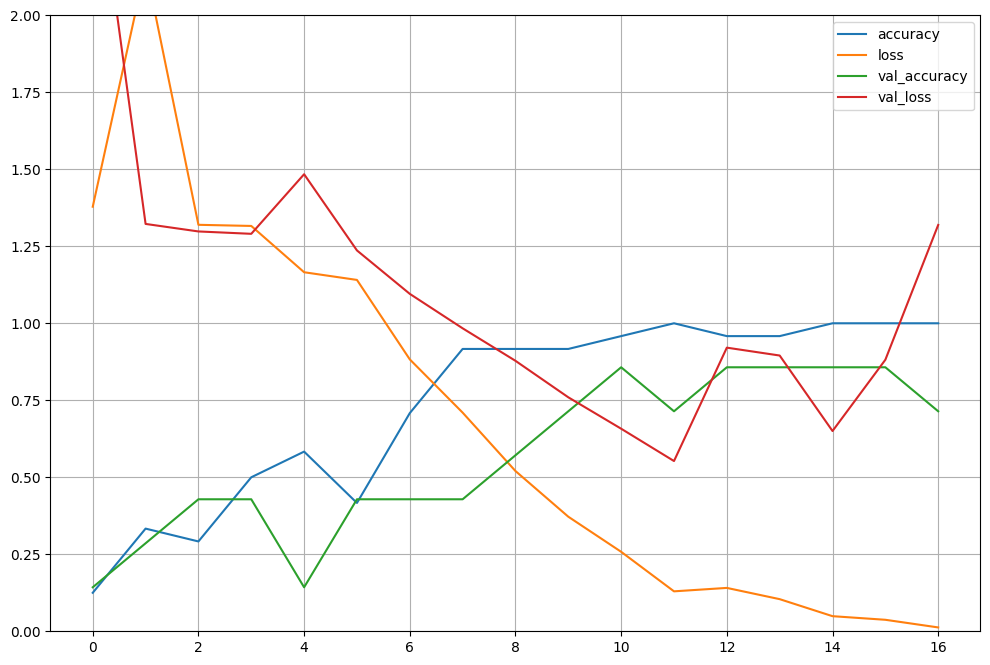

In [433]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,2) # sets the vertical range to [0-2]
plt.show()

In [434]:
# Lets generate new predictions
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


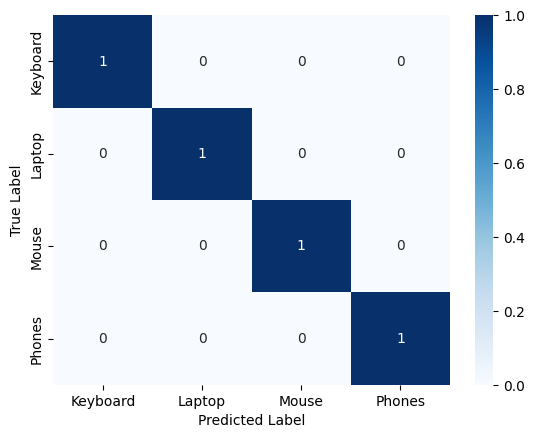

In [438]:
# analyze the results
y_test_pred = np.argmax(y_pred, axis=0)
y_test_true = np.argmax(y_test_one_hot, axis=0)

cm = confusion_matrix(y_test_true, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cbar=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [439]:
# continue